ER: 1.0
1: 0.9999999999999992
0: 0.9999999999999998
-1: 0.9999999999999999
-5: 1.0
-10: 0.9999999999999999
-20: 0.9999999999999998
-50: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-100: 1.0000000000000009


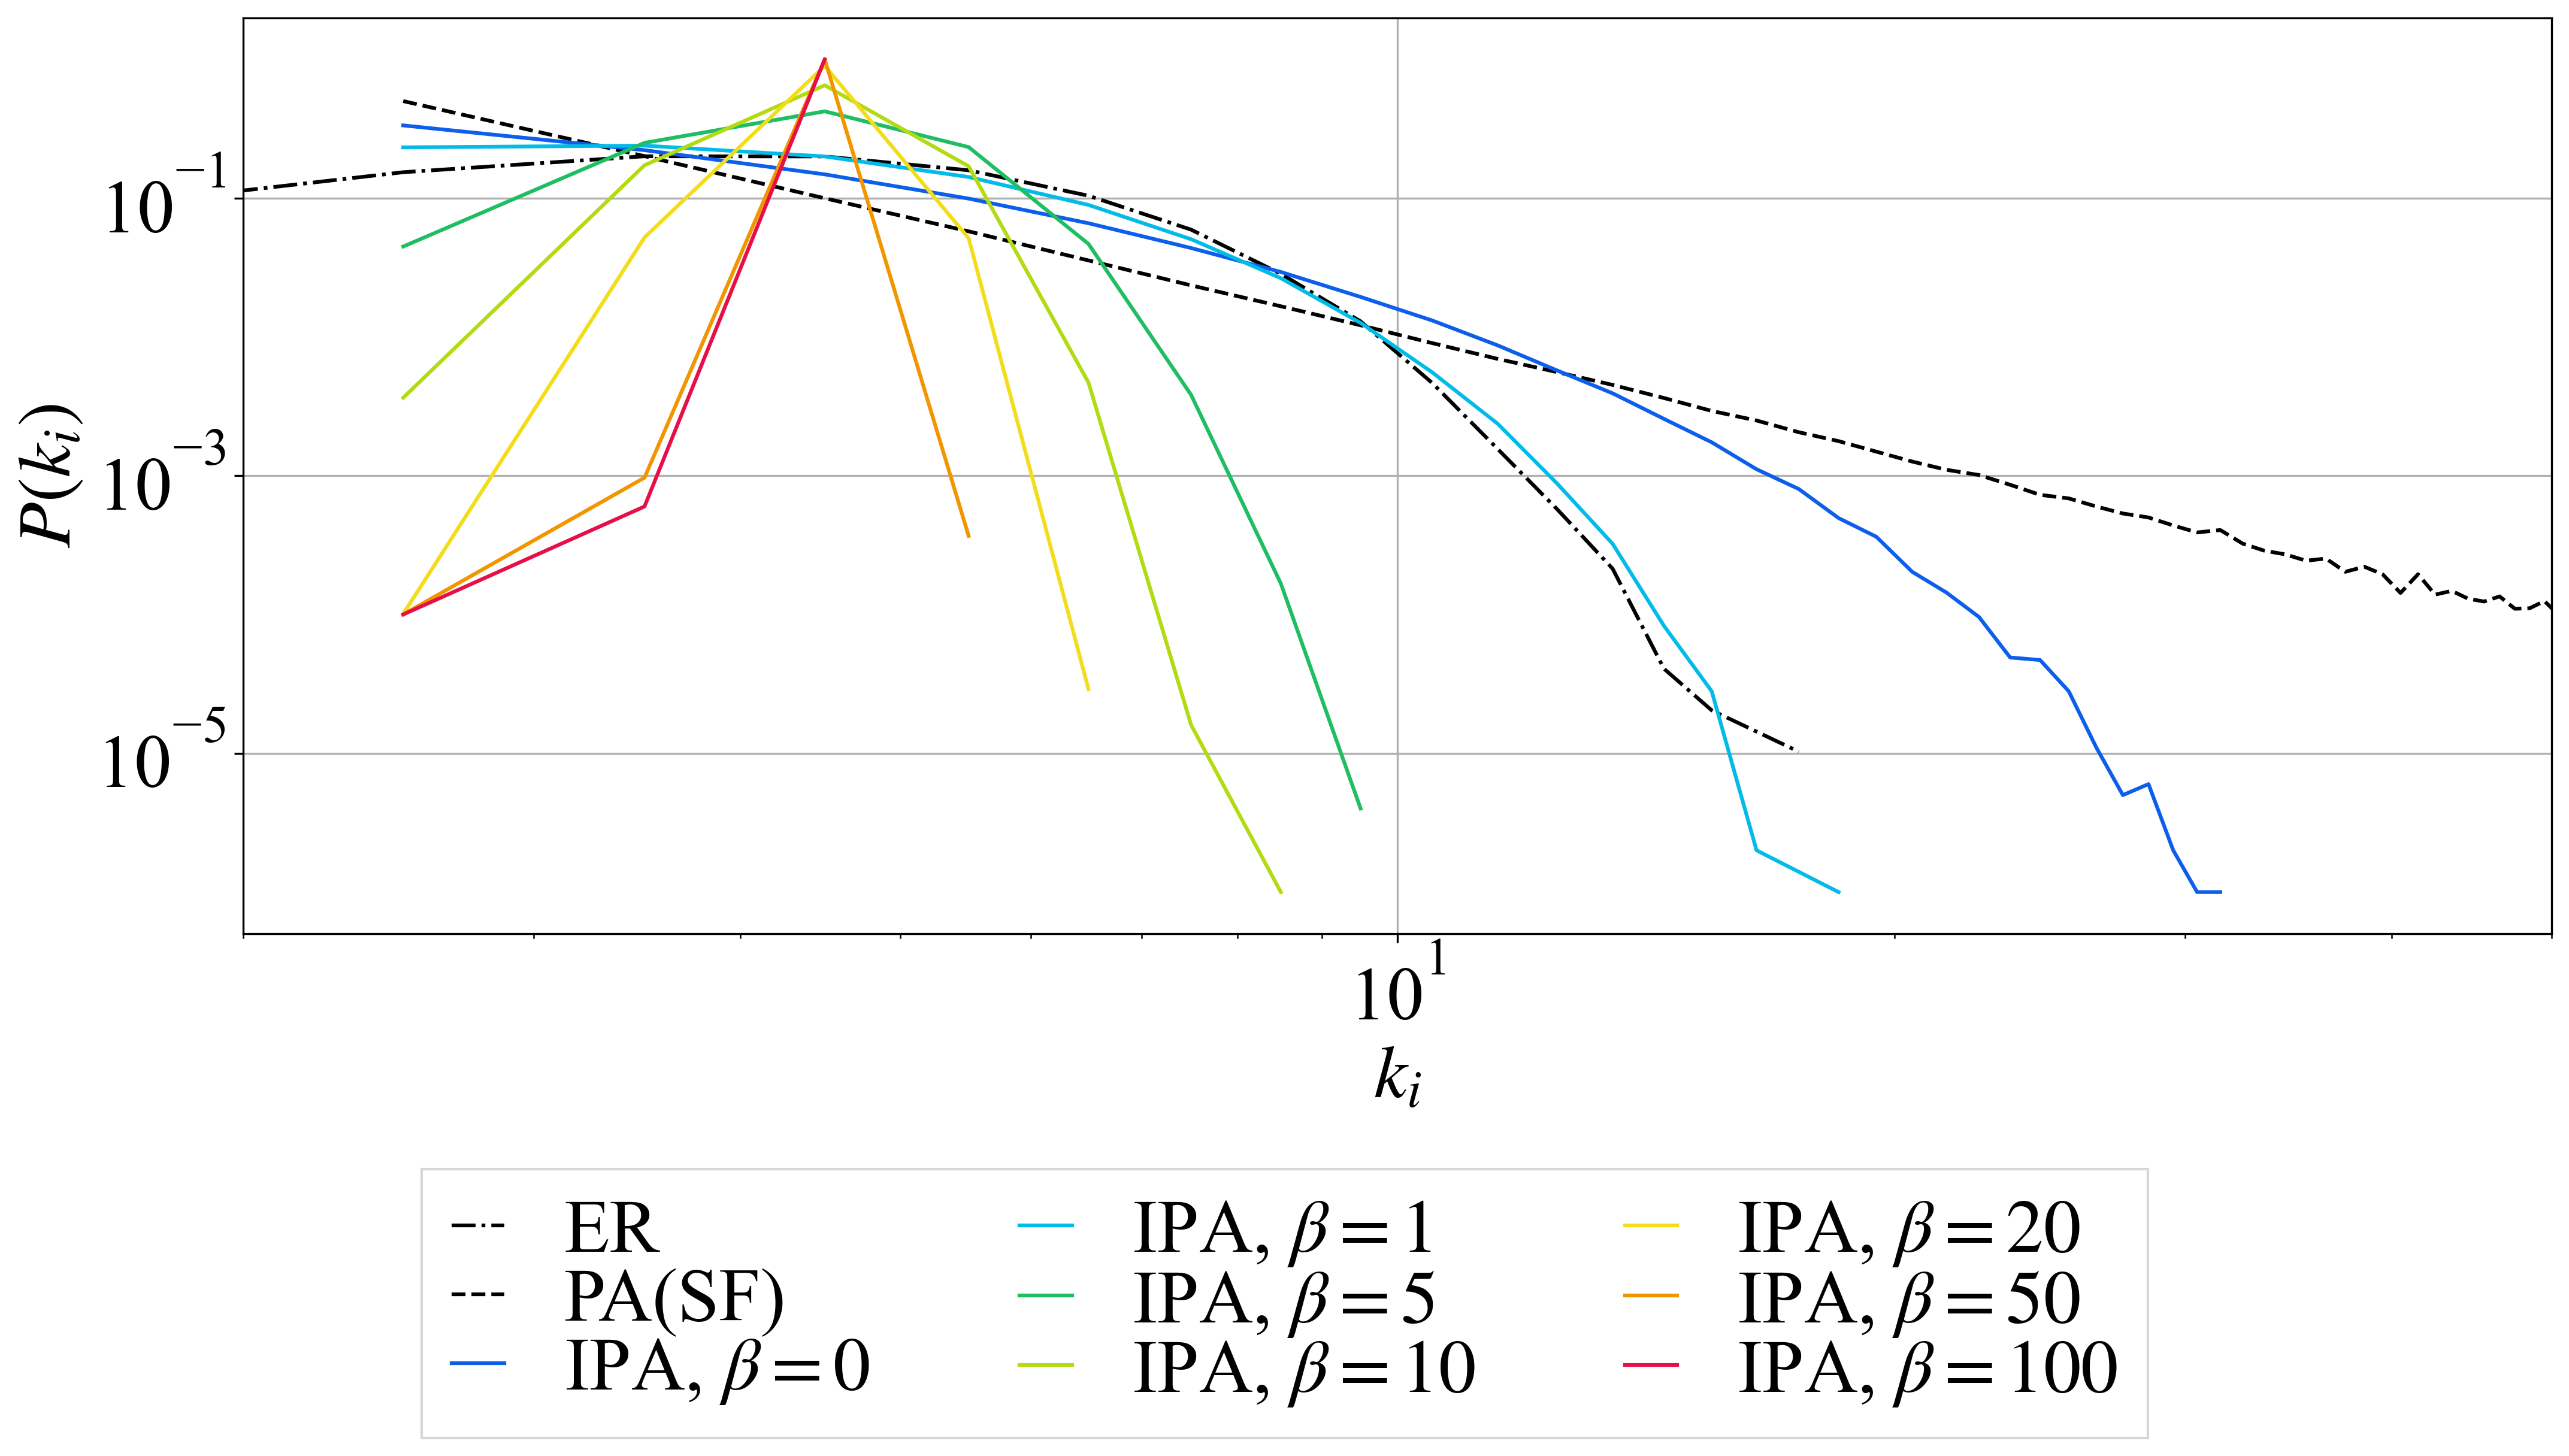

In [2]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import networkx as nx
from colorsys import hsv_to_rgb

from lib.utilities import frequency_distribution
from lib.utilities import graph_from_netfile

from matplotlib.ticker import ScalarFormatter

n = 1000
nn = 100
m = 2
bs = [1, 0, -1, -5, -10, -20, -50, -100]
config = True

config_str = "" if config else "_no_config"

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [
    "",
    "#0d5eea",
    "#03BBE8",
    "#1FBE62",
    "#b2db11",
    "#f3dd1a",
    "#f19601",
    "#e70f47",
]
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4"]

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 30
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 30
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

ys = 1
xs = 1
fig, ax = plt.subplots(ys, xs, tight_layout=True, figsize=(15*xs, 7*ys))

fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

# ax[0].set_title("Config")
# ax[1].set_title("No Config")

ax.set_ylabel("$P(k_{i})$")
ax.set_xlabel("$k_{i}$")

# ER network
dd_dict = dict()
for i in range(nn):
    G = graph_from_netfile(f"./data/network/ER/n1000/g_0.003974_{i}.net")
    df = frequency_distribution(list(dict(nx.degree(G)).values()), 1)
    for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
        if x in dd_dict:
            dd_dict[x] += y / nn
        else:
            dd_dict[x] = y / nn
dd_dict = {k:v for k, v in dd_dict.items() if v != 0}
ax.plot(list(dd_dict.keys()), list(dd_dict.values()), label="ER", linestyle="dashdot", color="black")
print(f"ER: {sum(list(dd_dict.values()))}")

for clr_i, b in enumerate(bs):
    dd_dict = dict()
    for i in range(nn):
        G = graph_from_netfile(f"./data/network/net_n10000_m2_b{b}/link{i}.net")
        df = frequency_distribution(list(dict(nx.degree(G)).values()), 1)
        for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
            if x in dd_dict:
                dd_dict[x] += y / nn
            else:
                dd_dict[x] = y / nn
    dd_dict = {k:v for k, v in dd_dict.items() if v != 0}

    if b == 1:
        l = r"PA(SF)"
        ax.plot(list(dd_dict.keys()), list(dd_dict.values()), label=l, linestyle="dashed", color="black")
    elif b == 0:
        l = r"IPA, $\beta=0$"
        ax.plot(list(dd_dict.keys()), list(dd_dict.values()), label=l, color=colors[clr_i])
    else:
        l = fr"IPA, $\beta={b*-1}$"
        ax.plot(list(dd_dict.keys()), list(dd_dict.values()), label=l, color=colors[clr_i])
    print(f"{b}: {sum(list(dd_dict.values()))}")

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim([2, 50])

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
fig.patch.set_alpha(0)
fig.savefig(f'./data/img/degree_distribution.eps', bbox_inches="tight", pad_inches=0.05)
# plt.savefig("./媒介中心性(エッジ)の分布の変化_loglog.png")
plt.show()
